# Лабораторная работа по Теории вероятностей и математической статистике
## Первая часть лабораторной работы
### 4. В лотерее среди N билетов M выигрышных. Игрок покупает r билетов. С.в. η — число выигрышных билетов среди купленных


In [2]:
import random
from collections import Counter
import pandas as pd
from math import factorial
from numpy import mean, median
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def combination(k, n):
    return factorial(n)/(factorial(k) * factorial(n - k))

def hypergeom(n, m, r, x):
    return (combination(x,m))*combination(r-x, n-m)/combination(r,n)

In [30]:
#Here we set the parameters
N = 100  #Experiments
n = 50   #Total tickets
m = 10   #Winners
r = 5    #buy tickets

data = []
inter = [0]
real = 0
for i in range (0, r+1):
    real = real + hypergeom(n, m, r, i)
    inter.append(real)
elem = []
for i in range (1, N+1):
    if r == 0:
        elem = [0]
    if r == n:
        elem = [n]
    if r>0:
        c = -1
        z = random.randint(0,n)/n
        for j in inter:
            if (z>= j):
                c = c + 1
            if z == 1:
                c = r                                                                                                                                                                                                                                                                                                                                                   
        elem.append(c) 
  
elem.sort()
#We creat the dictionary for the data
frecuency = Counter(elem)
for i in range(0,r+1):
    if i not in elem:
        frecuency[i] = 0
maximum = max(frecuency)
ag = dict(frecuency)
for i in range(0, maximum + 1):
    data.append([(ag.get(i)),(ag.get(i)/N)])
df =  pd.DataFrame(data)
print(df.T)


      0      1      2     3    4     5
0  30.0  48.00  18.00  3.00  0.0  1.00
1   0.3   0.48   0.18  0.03  0.0  0.01


## Вторая часть лабораторной работы

В данной задаче используется Гипергеометрический закон распределения $P(\eta = k) = \frac{C^k_{K}.C^{n-k} _{N-K}}{C^n_{N}}, \ \ k = 0,1,2,....K$

$E_{\eta} = \frac{K}{N} .n$ - мат. ожидание

$\=X = \frac{1}{n}\sum_{k=1}^n x_k$ - выборочное среднее

$|E_{\eta} - \={X}|$ - разница

$D_{\eta} = \frac{K}{N}.n .\frac{N-n}{N}.\frac{N-k}{N-1} $ - дисперсия

$S^2 = \frac{\sum_{k=1}^n(x_k - \={X})^2}{n - 1}$

$|D_{\eta} - S^2|$ - разница

$\^{Me}$ - медиана

$\^{R}$ - разница максимального и минимального значений в выборке

In [31]:
maximum = max(frecuency)
ag = dict(frecuency)
E = (m/n)*r
X = mean(elem)
DiffEX = abs(E-X)
D = (E*((n-r)/n)*((n-m)/(n-1)))
sum = 0
for xi in elem:
    sum = sum + (xi - X)**2
S2 = sum/(N-1)
difDS2 = S2 - D
Me = median(elem)
R = max(elem) - min(elem)
data = pd.DataFrame(data = data)
data = pd.DataFrame([[E, X, DiffEX, D, S2, difDS2, Me, R]], 
    columns=['E', 'X', 'diff_E_x', 'D', 'S2', 'diff_D_S2', 'Me', 'R'])
print (data)

     E     X  diff_E_x         D        S2  diff_D_S2   Me  R
0  1.0  0.98      0.02  0.734694  0.767273   0.032579  1.0  5


In [32]:
y1 =[]
x_ = 0
for i in range(0, r+1):
    x_ = x_ + ag.get(i)/N
    y1.append(x_)

real = []
for i in range (0, r+1):
    real1 = hypergeom(n, m, r, i)
    real.append(real1)
df = pd.DataFrame(real)
print(df.T)

y2 =[]
x1 = 0
for i in range(0, r+1):
    x = real[i]
    x1 = x1 + x 
    y2.append(x1)

maxep = 0
for i in range(0, r+1):
    maxot = abs(real[i] - elem[i])
    if maxot >= maxep:
        maxep = maxot

print('\n')
print("Максимальное отклонение =",round(maxot,6))



          0         1        2         3         4         5
0  0.310563  0.431337  0.20984  0.044177  0.003965  0.000119


Максимальное отклонение = 0.000119


### График $F_{\eta}(x)$ и $\^{F}_{\eta}(x)$ функций распределения

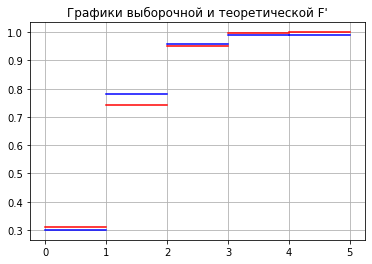

In [33]:
from matplotlib import ticker
# график функции эмпирического распределения
x = np.linspace(0, r,r+1)
fig, sec = plt.subplots()
sec.xaxis.set_major_locator(ticker.MultipleLocator(1))
sec.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
for k in range(0,r):
    sec.plot([x[k], x[k+1]], [y1[k], y1[k]], 'b')
    sec.plot([x[k], x[k+1]], [y2[k], y2[k]], 'r')
plt.title("Графики выборочной и теоретической F'")
plt.grid(True)
plt.show()

## Третья часть лабораторной работы

In [34]:
# Ключевые параметры
k = 5              # Число интервалов
alpha = 0.5         # Параметр значимости

# Достаем модули
from random import randint, seed
from scipy.stats import chi2
import pandas as pd
#seed(3)
# Делаем все просчеты
def task_3(elem, k, alpha, y2):
    x = range(0, r+1)
    flag = 1
    while flag != 0:
        inter = []
        for i in range(k - 1):
            inter.append(randint(0, len(y2) - 1))
        inter1 = []
        [inter1.append(x) for x in inter if x not in inter1]

        if len(inter) == len(inter1):
            flag = 0 
    inter.sort()
    print(inter)
    

    hist = {}
    hist[0] = [number for number in elem if number < inter[0]]
    for i in range(k - 2):
        hist[i + 1] = [number for number in elem if inter[i] <= number < inter[i + 1]]
    hist[k - 1] = [number for number in elem if number >= inter[k - 2]]

    number_obs = {}
    for i in sorted(hist.keys()):
        number_obs[i] = len(hist[i])

    q = [0]*k
    q[0] = y2[inter[0]]
    for i in range(k - 2):
        q[i + 1] = y2[inter[i + 1]] - y2[inter[i]]
    q[k - 1] = 1 - y2[inter[k - 2]]

    R0 = 0
    for i in range(k):
        R0 += (number_obs[i] - N*q[i])**2/(N*q[i])

    critic_value = 1 - chi2.cdf(R0, k - 1)
    if critic_value > alpha:
        a = 'Принята'
    else:
        a = 'Отвержена'
    return pd.DataFrame([q])
task_3(elem, k, alpha,y2)

[1, 2, 3, 4]


,0,1,2,3,4
0,0.7419,0.20984,0.044177,0.003965,0.000119


In [108]:
alpha = 0.1
from random import randint
from scipy.stats import chi2
import pandas as pd

# Делаем все просчеты
def task_3(elem, k, alpha, y2):
    z = 0
    zz = 0
    for h in range(0, 1000):
        data = []
        inter = [0]
        real = 0
        for i in range (0, r+1):
            real = real + hypergeom(n, m, r, i)
            inter.append(real)
        elem = []
        for i in range (1, N+1):
            if r == 0:
                elem = [0]
            if r == n:
                elem = [n]
            if r>0:
                c = -1
                z1 = random.randint(0,n)/n
                for j in inter:
                    if (z1>= j):
                        c = c + 1
                    if z1 == 1:
                        c = r                                                                                                                                                                                                                                                                                                                                                   
                elem.append(c) 
        elem.sort()

        #We creat the dictionary for the data
        frecuency = Counter(elem)
        for i in range(0,r+1):
            if i not in elem:
                frecuency[i] = 0
        maximum = max(frecuency)
        ag = dict(frecuency)
        y1 =[]
        x_ = 0
        for i in range(0, r+1):
            x_ = x_ + ag.get(i)/N
            y1.append(x_)
        real = []
        for i in range (0, r+1):
            real1 = hypergeom(n, m, r, i)
            real.append(real1)
        y2 =[]
        x1 = 0
        for i in range(0, r+1):
            x = real[i]
            x1 = x1 + x 
            y2.append(x1)
        x = range(0, maximum)
        k = 2
        alpha = 0.1*(10**(-100))
        inter = []
        h = len(y2)/k
        for i in range(1, k):
            inter.append(int(h*i))
            
        q = [0]*k
        q[0] = y2[inter[0]]
        for i in range(k - 2):
            q[i + 1] = y2[inter[i + 1]] - y2[inter[i]]
        q[k - 1] = 1 - y2[inter[k - 2]]
 

        hist = {}
        hist[0] = [number for number in elem if number < inter[0]]
        for i in range(k - 2):
            hist[i + 1] = [number for number in elem if inter[i] <= number < inter[i + 1]]
        hist[k - 1] = [number for number in elem if number >= inter[k - 2]]

        number_obs = {}
        for i in sorted(hist.keys()):
            number_obs[i] = len(hist[i])

        R0 = 0
        for i in range(k):
            R0 += (number_obs[i] - N*q[i])**2/(N*q[i])
        critic_value = 1 - chi2.cdf(R0, k - 1)
        if critic_value > alpha:
            a = 'Принята'
            z += 1
        else:
            a = 'Отвержена'
            zz += 1
    return z, zz
z, zz = task_3(elem, k, alpha, y2)
print(z, 'Принята')
print(zz, 'Отвержена')

471 Принята
529 Отвержена


In [109]:
alpha = 0.1
from random import randint
from scipy.stats import chi2
import pandas as pd

# Делаем все просчеты
def task_3(elem, k, alpha, y2):
    z = 0
    zz = 0
    for h in range(0, 1000):
        inter = [0]
        real = 0
        for i in range (0, r+1):
            real = real + hypergeom(n, m, r, i)
            inter.append(real)
        elem = []
        for i in range (1, N+1):
            if r == 0:
                elem = [0]
            if r == n:
                elem = [n]
            if r>0:
                c = -1
                z1 = random.randint(0,n)/n
                for j in inter:
                    if (z1>= j):
                        c = c + 1
                    if z1 == 1:
                        c = r                                                                                                                                                                                                                                                                                                                                                   
                elem.append(c) 
        
        elem.sort()
        #We creat the dictionary for the data
        frecuency = Counter(elem)
        for i in range(0,r+1):
            if i not in elem:
                frecuency[i] = 0
        maximum = max(frecuency)
        ag = dict(frecuency)
        y1 =[]
        x_ = 0
        for i in range(0, r+1):
            x_ = x_ + ag.get(i)/N
            y1.append(x_)
        real1 = []
        for i in range (0, r+1):
            real2 = hypergeom(n, m, r, i)
            real1.append(real2)
        y2 =[]
        x1 = 0
        for i in range(0, r+1):
            x = real1[i]
            x1 = x1 + x 
            y2.append(x1)

        x = range(0, maximum+1)
        k = 2

        inter = []
        h = len(y2)/k
        for i in range(0, k):
            inter.append(int(h*i))
            
        q = [0]*k
        q[0] = y2[inter[0]]
        for i in range(k - 2):
            q[i + 1] = y2[inter[i + 1]] - y2[inter[i]]
        q[k - 1] = 1 - y2[inter[k - 2]]
 

        hist = {}
        hist[0] = [number for number in elem if number < inter[0]]
        for i in range(k - 2):
            hist[i + 1] = [number for number in elem if inter[i] <= number < inter[i + 1]]
        hist[k - 1] = [number for number in elem if number >= inter[k - 2]]

        number_obs = {}
        for i in sorted(hist.keys()):
            number_obs[i] = len(hist[i])

        R0 = 0
        for i in range(k):
            R0 += (number_obs[i] - N*q[i])**2/(N*q[i])
        critic_value = 1 - chi2.cdf(R0, k - 1)
        if critic_value > alpha:
            a = 'Принята'
            z += 1
        else:
            a = 'Отвержена'
            zz += 1
    return z, zz
z, zz = task_3(elem, k, alpha, y2)
print(z, 'Принята')
print(zz, 'Отвержена')

0 Принята
1000 Отвержена
